In [4]:
!ls /home/jack/Desktop/GRAPHICS//clouddream/backup/deepdream/outputs

deepdreaminception_4d-pool_proj_20180508081444.png   input.jpg
deepdreaminception_5b-5x5_reduce_20180507140224.png  input.png
inception_3b-slash-5x5_reduce.jpg		     output.jpg


In [6]:
!mkdir junk

In [19]:
import os
import sys
from PIL import Image
import shutil
import time
import random

# Destination Image
path = r"/home/jack/Desktop/GRAPHICS/gmic/640x640/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)

#Palette source
path2 = r"/media/jack/db4e7ba1-11b4-4b5e-a4ce-b4d8004b36ec/junk/deep-dream-generator/notebooks/bugs/Fractalmages/Fractalmages/"
base_image2 = random.choice([
    x for x in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, x))
])
filename1=(path2+base_image2)

shutil.copy2(filename1, 'instagram/')# filename0 copy2 destimation 
shutil.copy2(filename0, 'instagram/')# filename1 copy2 destimation 

aa = Image.open(filename0).convert("RGB")
#bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
bb = Image.open(filename1).convert("RGB")
xx=aa.resize((640,640), Image.NEAREST)
yy=bb.resize((640,640), Image.NEAREST)
xx.save("junk/aa.png")
yy.save("junk/bb.png")
src = Image.open('junk/aa.png').convert('RGB')
dst = Image.open('junk/bb.png').convert('RGB')
src.save("junk/aa.png")
dst.save("junk/bb.png")

n = 5 #number of partitions per channel.
src_handle = Image.open("junk/bb.png")
dst_handle = Image.open("junk/aa.png")
src = src_handle.load()
dst = dst_handle.load()
assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l

lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)

def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])

lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)

for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]
    
    

filename = time.strftime("junk/%Y%m%d%H%M%S.png")
dst_handle.save(filename)

shutil.copy2(filename, "instagram/")
print filename

(253, 198, 99)
junk/20180509142222.png


In [28]:
%%writefile palletswitch.py
import os
import sys
from PIL import Image
import shutil
import time
import random
n = 5
def main():
    n = 5
    # Destination Image
    path = r"/home/jack/Desktop/GRAPHICS/gmic/640x640/"
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])
    filename0=(path+base_image)

    #Palette source
    path2 = r"/media/jack/db4e7ba1-11b4-4b5e-a4ce-b4d8004b36ec/junk/deep-dream-generator/notebooks/bugs/Fractalmages/Fractalmages/"
    base_image2 = random.choice([
        x for x in os.listdir(path2)
        if os.path.isfile(os.path.join(path2, x))
    ])
    filename1=(path2+base_image2)

    shutil.copy2(filename1, 'instagram/')# filename0 copy2 destimation 
    shutil.copy2(filename0, 'instagram/')# filename1 copy2 destimation 

    aa = Image.open(filename0).convert("RGB")
    #bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
    bb = Image.open(filename1).convert("RGB")
    xx=aa.resize((640,640), Image.NEAREST)
    yy=bb.resize((640,640), Image.NEAREST)
    xx.save("junk/aa.png")
    yy.save("junk/bb.png")
    src = Image.open('junk/aa.png').convert('RGB')
    dst = Image.open('junk/bb.png').convert('RGB')
    src.save("junk/aa.png")
    dst.save("junk/bb.png")

    n = 5 #number of partitions per channel.
    src_handle = Image.open("junk/bb.png")
    dst_handle = Image.open("junk/aa.png")
    src = src_handle.load()
    dst = dst_handle.load()
    assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

    def makePixelList(img):
        l = []
        for x in range(img.size[0]):
            for y in range(img.size[1]):
                l.append((x,y))
        return l

    lsrc = makePixelList(src_handle)
    ldst = makePixelList(dst_handle)

    def sortAndDivide(coordlist,pixelimage,channel): #core
        global src,dst,n
        retlist = []
        #sort
        coordlist.sort(key=lambda t: pixelimage[t][channel])
        #divide
        partitionLength = int(len(coordlist)/n)
        if partitionLength <= 0:
            partitionLength = 1
        if channel < 2:
            for i in range(0,len(coordlist),partitionLength):
                retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
        else:
            retlist += coordlist
        return retlist

    print(src[lsrc[0]])

    lsrc = sortAndDivide(lsrc,src,0)
    ldst = sortAndDivide(ldst,dst,0)

    for i in range(len(ldst)):
        dst[ldst[i]] = src[lsrc[i]]



    filename = time.strftime("junk/%Y%m%d%H%M%S.png")
    dst_handle.save(filename)

    shutil.copy2(filename, "instagram/")
    return filename

Overwriting palletswitch.py


In [29]:
!rm palletswitch.pyc

rm: cannot remove 'palletswitch.pyc': No such file or directory


In [4]:
import palletswitch
count = 0
while count <50:
    palletswitch.main()
    count = count +1

(128, 89, 167)
(227, 152, 58)
(190, 72, 57)
(186, 175, 100)
(159, 170, 177)
(80, 96, 50)
(71, 2, 35)
(75, 48, 39)
(255, 255, 2)
(114, 66, 24)
(0, 0, 0)
(254, 86, 32)
(175, 43, 21)
(128, 89, 167)
(221, 116, 18)
(80, 39, 20)
(0, 0, 0)
(80, 96, 50)
(33, 48, 39)
(21, 52, 17)
(0, 0, 0)
(24, 75, 160)
(24, 75, 160)
(165, 72, 50)
(255, 209, 171)
(145, 32, 38)
(96, 61, 44)
(111, 99, 89)
(186, 175, 100)
(255, 207, 165)
(145, 32, 38)
(253, 198, 99)
(0, 0, 0)
(80, 96, 50)
(24, 75, 160)
(32, 34, 34)
(0, 15, 255)
(51, 0, 15)
(0, 15, 255)
(145, 32, 38)
(221, 116, 18)
(22, 76, 164)
(227, 152, 58)
(15, 13, 5)
(22, 76, 164)
(61, 47, 37)
(71, 2, 35)
(24, 75, 160)
(0, 0, 128)
(80, 51, 40)


In [2]:
!showme junk/20180509142745.png

In [18]:
import os
import sys
from PIL import Image
import shutil
import time
import random
import numpy as np
from numpy import asarray
path = r"/media/jack/db4e7ba1-11b4-4b5e-a4ce-b4d8004b36ec/junk/deep-dream-generator/notebooks/bugs/Fractalmages/Fractalmages/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)

path2 = r"posted/"
base_image2 = random.choice([
    x for x in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, x))
])
filename1=(path2+base_image2)



imgA = Image.open(filename0).convert("RGB");imga =imgA.resize((640,640), Image.NEAREST)
imga.save('TMPa.jpg');imgc = Image.open('TMPa.jpg')
imgc.load()
imgB = Image.open(filename1).convert("RGB");imgb =imgB.resize((640,640), Image.NEAREST)
imga.save('TMPb.jpg');imgd = Image.open('TMPb.jpg')
imgd.load()
print imgc.size, imgd.size

OSError: [Errno 2] No such file or directory: 'posted/'

# Images divide function

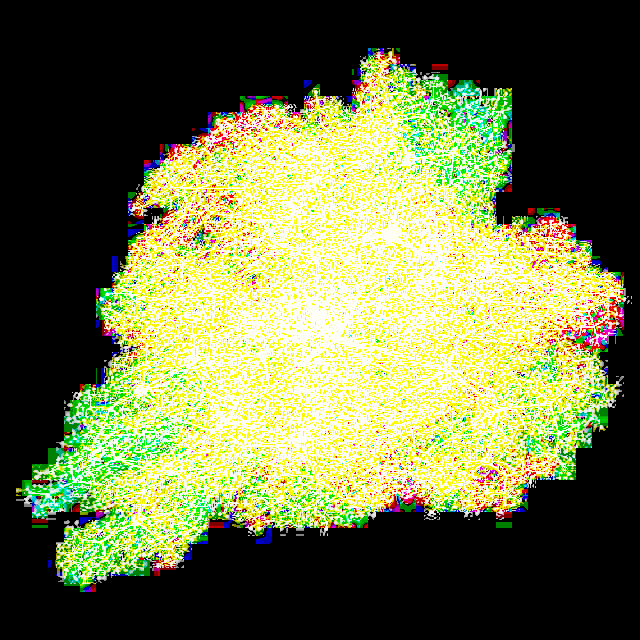

In [33]:
# Images divide function
import os
import sys
from PIL import Image
import shutil
import time
import random
import numpy as np
from numpy import asarray
path = r"/home/jack/Desktop/deep-dream-generator/notebooks/context-free/output/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)

path2 = r"posted/"
base_image2 = random.choice([
    x for x in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, x))
])
filename1=(path2+base_image2)

imgA = Image.open(filename0).convert("RGB")
imga =imgA.resize((640,640), Image.NEAREST);imga.save('TMPa.jpg')
imgc = Image.open('TMPa.jpg');imgc.load()
imgB = Image.open(filename1).convert("RGB")
imgb =imgB.resize((640,640), Image.NEAREST);imga.save('TMPb.jpg')
imgd = Image.open('TMPb.jpg');imgd.load()

a = asarray(imgc);b = asarray(imgd)
c = a/((b.astype('float')+1)/256)
d = c*(c < 255)+255*np.ones(np.shape(c))*(c > 255)
e = d.astype('uint8')

imgOut = Image.fromarray(e)
#imgOut.save('PILdiv0.png', 'PNG')
imgOut

In [22]:
!chmod a+x PaletteGenerator

In [20]:
%%writefile PaletteGenerator
#!/bin/bash

while true; do
  python PaletteGenerator.py
  echo "posted :"
  date
  sleep 1200s
done

Writing PaletteGenerator


In [21]:
%%writefile PaletteGenerator.py
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import os
import sys
from PIL import Image
import shutil
import time
import random
#input2='/home/jack/Desktop/deep-dream-generator/notebooks/bugs/butterflies/000163.jpg'
#input1='/home/jack/Desktop/deep-dream-generator/notebooks/context-free/output/20170828154222.png'

path = r"/home/jack/Desktop/deep-dream-generator/notebooks/context-free/output/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)

#custom = "junk/mixpalette.png"
#filename0=(filename0)

path2 = r"posted/"
base_image2 = random.choice([
    x for x in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, x))
])
filename1=(path2+base_image2)

#custom = "junk/mixpalette.png"
#filename0=(filename0)




#input1='/home/jack/Desktop/imagebot/colorful/20170824124329.jpg'
#input2='/home/jack/Desktop/imagebot/posted/'
shutil.copy2(filename0, 'instagram/') # complete target filename given
shutil.copy2(filename1, 'instagram/')# target filename is /dst/dir/file.ext

aa = Image.open(filename0).convert("RGB")
#bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
bb = Image.open(filename1).convert("RGB")
xx=aa.resize((640,640), Image.NEAREST)
yy=bb.resize((640,640), Image.NEAREST)
xx.save("junk/aa.png")
yy.save("junk/bb.png")
src = Image.open('junk/aa.png').convert('RGB')
dst = Image.open('junk/bb.png').convert('RGB')
src.save("junk/aa.png")
dst.save("junk/bb.png")



n = 5 #number of partitions per channel.


src_handle = Image.open("junk/bb.png")
dst_handle = Image.open("junk/aa.png")
src = src_handle.load()
dst = dst_handle.load()
assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l

lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)

def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])

lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)

for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]
    
    
filename = time.strftime("junk/PalletteTemp.png")

dst_handle.save(filename)

shutil.copy2(filename, "instagram/")

custom = "junk/PalletteTemp.png"
filename0=(custom)




def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    #halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    halo = Image.new('RGBA', img.size, (255,255,255, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 45)
    #font = ImageFont.truetype("/home/jack/.fonts/GRUNTREAPER.ttf", 70)
    #font = ImageFont.truetype("/home/jack/.fonts/Nightbird.ttf", 70)
    #font = ImageFont.truetype("/home/jack/.fonts/Nightbird.ttf", 70)
    #font = ImageFont.truetype("/home/jack/.fonts/Punktype.ttf", 70)
    text_col = (255,200,0) # bright green
    halo_col = (0, 0,0)   # black
    #text_col = (230, 230,250) # bright green
    #halo_col = (0,0,0)  # black (0,0,0)    
    textin = (generate_the_word("wordcloud.txt"))
    #i2 = draw_text_with_halo(inp, (15, 8), "HIGH FIVE", font, text_col, halo_col)
    i2 = draw_text_with_halo(inp, (20, 10), textin, font, text_col, halo_col)
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    text_col2 = (15, 5, 10) # bright green
    halo_col2 = (255, 255,255) 
    #text_col2 = (255, 255,255) # signature white
    #halo_col2 = (0, 0, 0)   # signature black
    txt=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST.jpg")

#removed keys for privacy reasons
CONSUMER_KEY = 'YazCRIfWX4VICiRCOiph08jDL'
CONSUMER_SECRET = 'QOkLHou6NMwkghSHjMFXMdffQKJlDzttKtP6uBCcZ4VlQtvJyc'
ACCESS_KEY = '296906916-AWggjhqpEWIS7EzXXhc2pOPBeCVJczpOm11cQGIf'
ACCESS_SECRET = 'zFrCiyaPt8gCBVVs1bLCmdCSyQQ3DKxT5wHJq2tOu2AMj'



twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("art.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
#STR = (text_model.make_short_sentence(140))
#STR = ("$Python $Imagery $Redneck #filipina #filipinowoman posted with #JupyterNotebook.")
STR = (generate_the_word("key.txt"))
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

#photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])
#!showme tmp/TM_POST.jpg

Overwriting PaletteGenerator.py
